Back to the main [Index](../index.ipynb)

In [1]:
# Use %matplotlib if you are running in the ipython shell.
%matplotlib notebook

from __future__ import print_function, division
from abipy.lessons.lesson_kpoint_convergence import Lesson

lesson = Lesson()
lesson

K-point convergence study for a semi-conductor
===============================================

Background
----------

This lesson deals with the basic k-point convergence study that is needed in any DFT calculation in periodic systems.
In such systems, indeed, the first Brillouin zone (BZ) needs to be discretized when performing the
integration of several important quantities e.g. the electronic density or the electronic energy.
Integrals over the BZ are therefore turned into sums over discrete k-points and the k-mesh should
be dense enough, but at the same time as coarse as possible to make for an efficient calculation.
Your first investigation into a new compound will often be a k-point convergence study.

It is worth stressing that the density of the k-mesh needed to reach converged results is system-dependent.
Note that metals need much denser k-meshes than semiconductors.
The presence of the Fermi surface, indeed, introduces discontinuities in the integrand functions and a
fictitious broadening of the occupation factors (tsmear) should be introduced in order to accelerate
the convergence of the integrals.

The related Abinit variables
----------------------------

The variables used to specify the k-point sampling are:

    * ngkpt
    * shiftk
    * kptopt (see exercises)

The variables used to specify the occupation scheme in metals are:

    * occopt (see exercises)
    * tsmear (see exercises)



For a more detailed description of the variables, you are invited to consult the abinit documentation.
The full description, directly from the official abinit docs, is available in ipython with the command:

    .. code-block:: python

        print(lesson.docvar("inputvariable"))


Description of the lesson
-------------------------

When performed manually, a k-point convergence study would require
the preparation of several input files, running abinit for all
the inputs and then extracting and studying the quantity under investigation.
This lesson shows how this process can be facilitated thanks to abipy.

We will construct a single python object, an abipy flow, that contains all
the information needed for the calculations.
The flow also provides methods for running abinit, inspecting the input and the output
as well tools for analyzing the final results.

Executing the lesson
--------------------

This lesson can be started in ipython by importing it with:

    .. code-block:: python

        from abipy.lessons.lesson_kpoint_convergence import Lesson
        lesson = Lesson()

This `lesson` module gives us all the tools needed for the exercises.
For instance the command:

    .. code-block:: python

        lesson

displays this text and can be recalled at any moment.

The main object we use to connect different calculations is the AbiPy flow.
The lesson module provides a method that builds and returns a flow to perform k-point convergence studies.
The flow is constructed with the command:

    .. code-block:: python

        flow = lesson.make_ngkpt_flow()

In this case make_ngkpt_flow builds a flow for silicon since no argument is passed to the function.

Our flow has several useful methods. For instance:

    .. code-block:: python

        flow.show_inputs()

displays all the inputs that will be 'passed' to abinit.

To start the calculation inside the python shell, use the following command:

    .. code-block:: python

        flow.make_scheduler().start()

The scheduler is a sort of daemon that submits all the tasks that are ready to run.
In our case all the tasks in the flow are independent so the first
cycle of the scheduler will submit all the tasks in the flow.
More complicated flows may have tasks that can start only when their `parents` are completed.
We will encounter similar flows later on when discussing band structure calculations with AbiPy.

Once the flow is completed, you can analyze the results with

    .. code-block:: python

        lesson.analyze(flow)

This call reads the output files, retrieves 

# Examples:

### To get the documentation of `ecut`:

In [2]:
import abipy.abilab as abilab
abilab.docvar("ecut")

ecut  <Energy CUToff>

### Generate the flow with:

In [3]:
flow = lesson.make_ngkpt_flow()
print(flow)

<Flow, node_id=84341, workdir=flow_lesson_Si_kpoint_convergence>


### Show the Abinit inputs:

In [4]:
flow.show_inputs()



<ScfTask, node_id=84343, workdir=flow_lesson_Si_kpoint_convergence/w0/t0>
############################################################################################
#                                      SECTION: varbas                                      
############################################################################################
# <Energy CUToff>
 ecut 10
# <TOLerance on the potential V(r) ReSidual>
 tolvrs 1e-09
# <KPoinTs OPTion>
 kptopt 1
# <SHIFT for K points>
 shiftk 0 0 0
# <Number of Grid points for K PoinTs generation>
 ngkpt 2 2 2
# <Number of SHIFTs for K point grids>
 nshiftk 1
############################################################################################
#                                         STRUCTURE                                         
############################################################################################
# <CELL lattice vector scaling>
 acell    1.0    1.0    1.0
# <vectors (X) of atom positions in REDuc

### To visualize the connections among the tasks use (requires networkx):

<IPython.core.display.Javascript object>


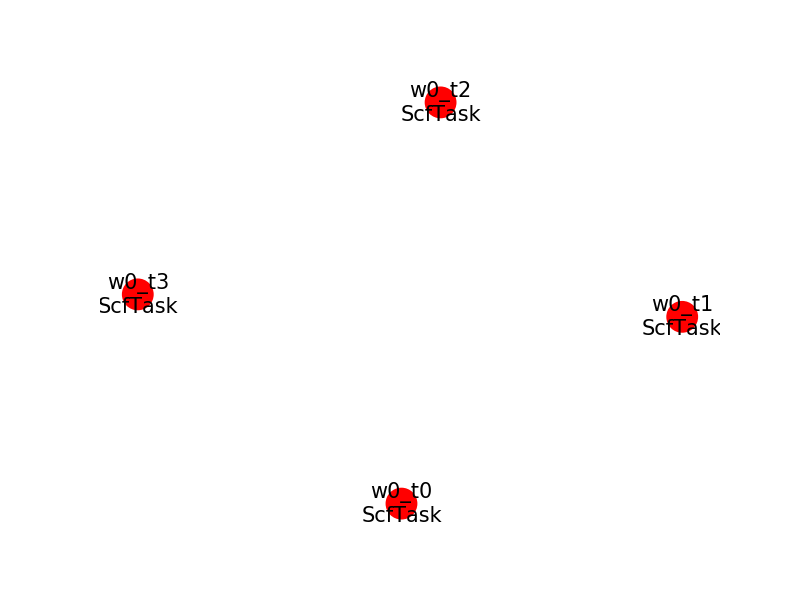

In [5]:
flow.plot_networkx()

### To run the calculation:

In [6]:
%%capture
# The previous line discards the output in ipython notebooks
flow.make_scheduler().start()

0

### To analyze the convergence of the energy wrt the number of $k$ points:

<IPython.core.display.Javascript object>


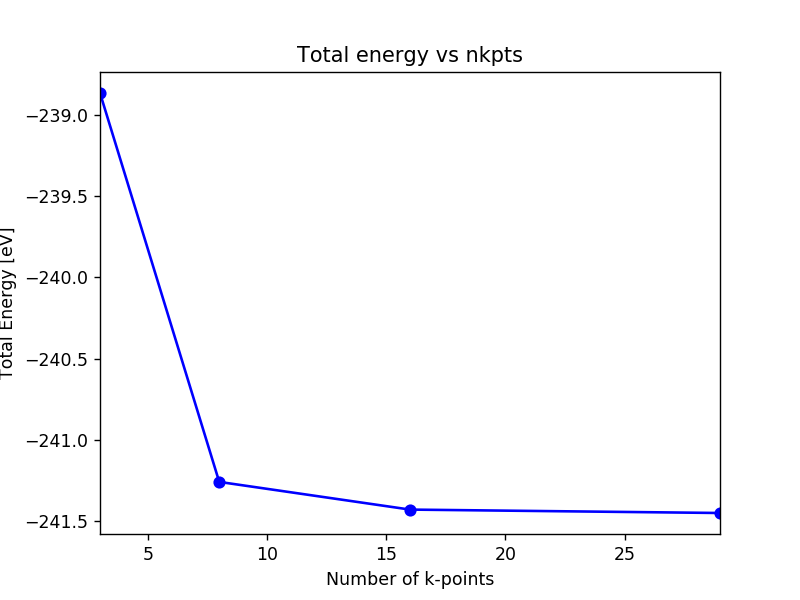

In [7]:
lesson.analyze(flow)

### To inspect the SCF cycle of the first SCF task:

<IPython.core.display.Javascript object>


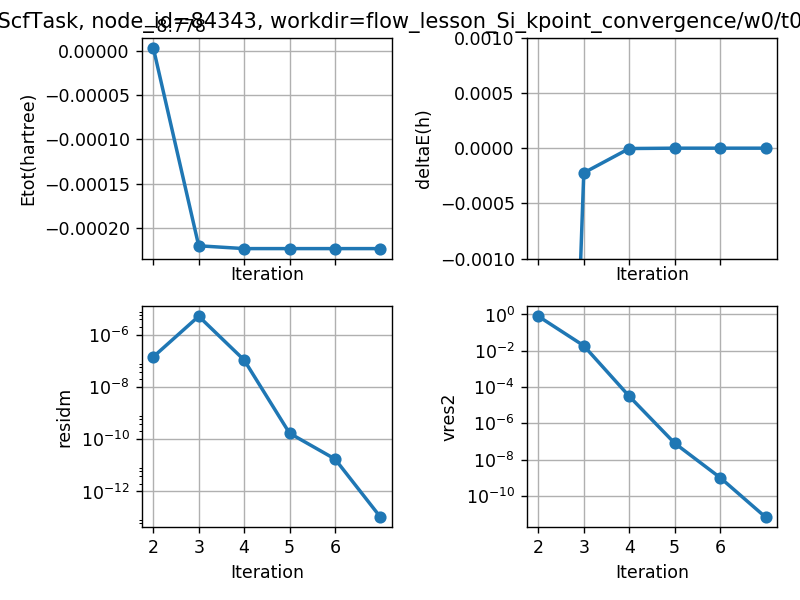

In [8]:
scf_task = flow[0][0]
fig = scf_task.inspect()

### To get the list of warnings/comments/errors reported in the log file of ABINIT.

In [9]:
print(scf_task.get_event_report())

Events found in /Users/gmatteo/git_repos/abipy/abipy/examples/notebooks/lessons/flow_lesson_Si_kpoint_convergence/w0/t0/run.log

[1] <AbinitWarning at m_nctk.F90:522>
    netcdf lib does not support MPI-IO and: NetCDF: Parallel operation on file opened for non-parallel access
    
[2] <AbinitWarning at m_nctk.F90:542>
    The netcdf library does not support parallel IO, see message above
    Abinit won't be able to produce files in parallel e.g. when paral_kgb==1 is used.
    Action: install a netcdf4+HDF5 library with MPI-IO support.
    
[3] <AbinitWarning at distrb2.F90:113>
    nkpt*nsppol (3) is not a multiple of nproc_kpt (2)
    The k-point parallelisation is not efficient.
    
num_errors: 0, num_warnings: 3, num_comments: 0, completed: True



### To show the history of the task:

In [10]:
print(scf_task.history)

[Tue Mar 21 12:36:55 2017] Status changed to Ready. msg: Status set to Ready
[Tue Mar 21 12:36:55 2017] Setting input variables: {'max_ncpus': 2, 'autoparal': 1}
[Tue Mar 21 12:36:55 2017] Old values: {'max_ncpus': None, 'autoparal': None}
[Tue Mar 21 12:36:55 2017] Status changed to Initialized. msg: finished autoparallel run
[Tue Mar 21 12:36:55 2017] Submitted with MPI=2, Omp=1, Memproc=2.0 [Gb] submitted to queue 
[Tue Mar 21 12:37:05 2017] Task completed status set to ok based on abiout
[Tue Mar 21 12:37:05 2017] Finalized set to True


### Analyzing the results stored in the `GSR` file:

At the end of the run, both `ScfTasks` and `NscTasks` produce a 
GSR file (Ground-State Results file).
This file is in netcdf format and contains the most important results of the calculation
(crystalline structure, electron-bands, energy, pressure ...)

To open a GSR file:

In [11]:
gsr = scf_task.open_gsr()

print("Structure: ", gsr.structure)
print("Pressure: ", gsr.pressure)

Structure:  Full Formula (Si2)
Reduced Formula: Si
abc   :   3.866975   3.866975   3.866975
angles:  60.000000  60.000000  60.000000
Sites (2)
  #  SP       a     b     c  cartesian_forces
---  ----  ----  ----  ----  --------------------------------------------------------------
  0  Si    0     0     0     [  0.00000000e+00  -5.80155101e-28  -0.00000000e+00] eV ang^-1
  1  Si    0.25  0.25  0.25  [  0.00000000e+00   5.80155101e-28  -0.00000000e+00] eV ang^-1
Pressure:  3.14818351154 GPa


The GSR file contains the Kohn-Shame band structure. To plot the bands with matplotlib use:

<IPython.core.display.Javascript object>


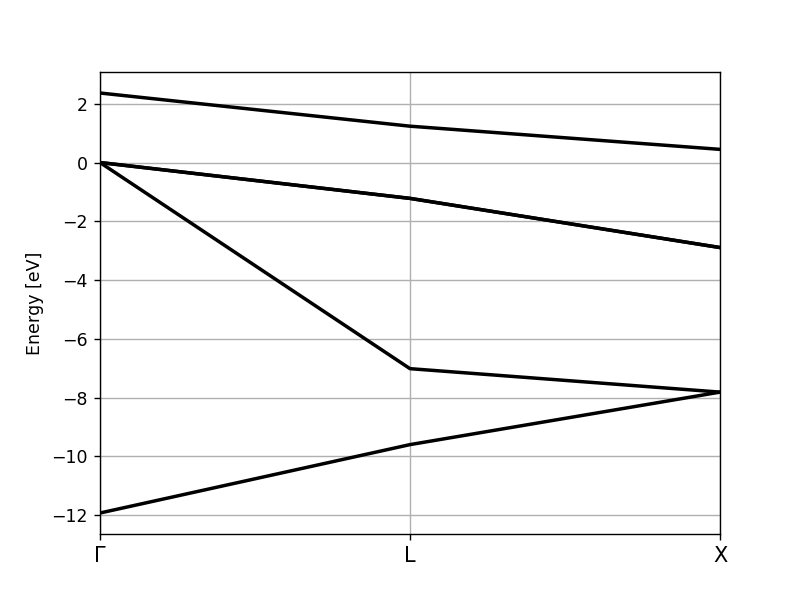

/Users/gmatteo/git_repos/pymatgen/pymatgen/symmetry/bandstructure.py:61: UserWarning: The input structure does not match the expected standard primitive! The path can be incorrect. Use at your own risk.
  warnings.warn("The input structure does not match the expected standard primitive! "


In [12]:
fig = gsr.plot_ebands()

To show the first Brillouin zone with matplotlib:

<IPython.core.display.Javascript object>


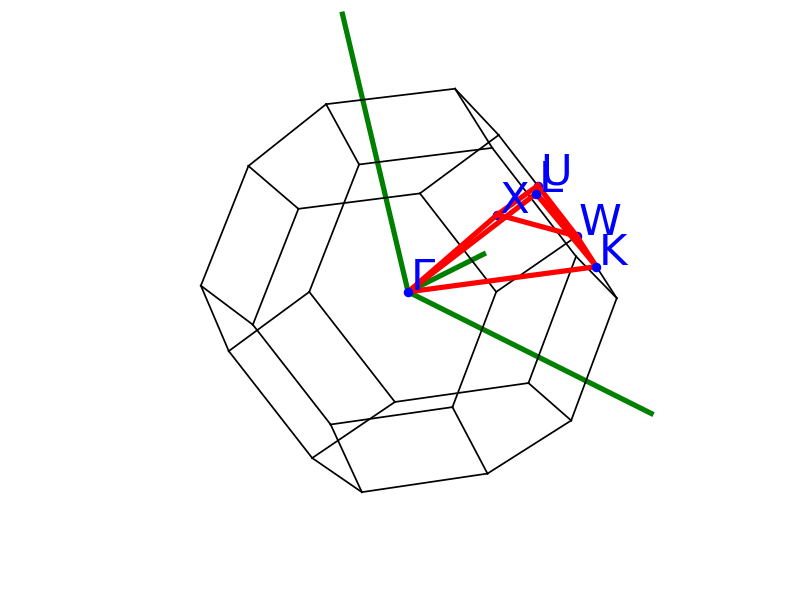

In [13]:
fig = gsr.show_bz()

To visualize the structure with Xcrysden (Vesta):

In [16]:
#gsr.structure.visualize("xcrysden")
gsr.structure.visualize("vesta")

Writing data to: /Users/gmatteo/git_repos/abipy/abipy/examples/notebooks/lessons/tmpOWPMUn.xsf


0

# Exercises:

In [17]:
import abipy.data as abidata

# Calculation for Al (metal --> smearing technique)
al_flow = lesson.make_ngkpt_flow(structure_file=lesson.abidata.cif_file('al.cif'), metal=True)

In [18]:
al_flow.show_inputs()



<ScfTask, node_id=84349, workdir=flow_lesson_Al_kpoint_convergence/w0/t0>
############################################################################################
#                                      SECTION: varbas                                      
############################################################################################
# <Energy CUToff>
 ecut 10
# <TOLerance on the potential V(r) ReSidual>
 tolvrs 1e-09
# <OCCupation OPTion>
 occopt 7
# <KPoinTs OPTion>
 kptopt 1
# <SHIFT for K points>
 shiftk 0 0 0
# <Number of Grid points for K PoinTs generation>
 ngkpt 2 2 2
# <Number of SHIFTs for K point grids>
 nshiftk 1
############################################################################################
#                                       SECTION: vargs                                      
############################################################################################
# <Temperature of SMEARing>
 tsmear 0.04
############################

In [19]:
%%capture
al_flow.make_scheduler().start()

0

Analyze the results:

In [21]:
lesson.analyze(al_flow)

IndexError: list index out of range

To create a pandas table with the GS results of the 4 tasks

In [ ]:
with abilab.abirobot(al_flow, "GSR") as robot:
    data = robot.get_dataframe()  
data

For a quick introduction to Pandas, see:

   * [A practical introduction to IPython Notebook & pandas](http://nbviewer.ipython.org/github/jvns/talks/blob/master/pydatanyc2013/PyData%20NYC%202013%20tutorial.ipynb)
   * [Diving into Open Data with IPython Notebook & Pandas](http://nbviewer.ipython.org/github/jvns/talks/blob/master/pyconca2013/pistes-cyclables.ipynb)

To select the most important columns:

In [ ]:
data = data[["nkpt", "energy", "pressure"]]
data

Note that `lesson.analyze` is just wrapping:

In [ ]:
data.plot("nkpt", "energy")

hence we **strongly** encourage you to learn how to use the python API and pandas.
Only in this case, indeed, you will really benefit from the interface provided by AbiPy!

This is the code that is executed when you call `lesson.analyze`:

In [ ]:
from abipy.tools.notebooks import print_source
print_source(lesson.analyze)

As you can see, the name of columns are hard-coded. This means that you cannot use the `analyze` 
method to plot arbitrary values.
If you learn how to use `Pandas` and `matplotlib`, then you can easily write code that 
is tailored to your needs. 
Let's plot, for example, the pressure as a function of the number of k-points:

In [ ]:
ax = data.plot(x="nkpt", y="pressure", title="Pressure vs nkpts", legend=False, style="b-o")
ax.set_xlabel("Number of k-points")
ax.set_ylabel("Pressure")